In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

rc('font', **font)
rc('text', usetex=True)

In [6]:
file_name = {}
for i in np.arange(1, 51, 1):
    mv_prefix = '0.'
    i = str(i)
    i = i.zfill(3)+'000'
    mv = mv_prefix+i

    file_name["mV=%s_NOE_BSM_anu_e_mu_gee.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_anu_e_mu_gee.txt"%mv)
    file_name["mV=%s_NOE_BSM_anu_e_mu_get.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_anu_e_mu_get.txt"%mv)
    file_name["mV=%s_NOE_BSM_anu_tau_mu_get.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_anu_tau_mu_get.txt"%mv)
    file_name["mV=%s_NOE_BSM_nu_e_mu_gee.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_nu_e_mu_gee.txt"%mv)
    file_name["mV=%s_NOE_BSM_nu_e_mu_get.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_nu_e_mu_get.txt"%mv)
    file_name["mV=%s_NOE_BSM_nu_tau_mu_get.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_BSM_nu_tau_mu_get.txt"%mv)
    
    file_name["mV=%s_NOE_SM_anu_e.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_SM_anu_e.txt"%mv)
    file_name["mV=%s_NOE_SM_anu_tau.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_SM_anu_tau.txt"%mv)
    file_name["mV=%s_NOE_SM_nu_e.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_SM_nu_e.txt"%mv)
    file_name["mV=%s_NOE_SM_nu_tau.txt"%mv] = np.loadtxt("./output/"+"mV=%s_NOE_SM_nu_tau.txt"%mv)

In [7]:
n_faser = 200000

In [8]:
def chi2_get(SM_anu_e,
             SM_nu_e,
             SM_anu_tau,
             SM_nu_tau,
             BSM_nu_e_mu_get,
             BSM_anu_e_mu_get,
             BSM_nu_tau_mu_get,
             BSM_anu_tau_mu_get,
             NOE_nu_e_BSM_BEST,
             NOE_nu_tau_BSM_BEST,
             NOE_anu_e_BSM_BEST,
             NOE_anu_tau_BSM_BEST,
             get,
             n_faser):
    
    SM_anu_e = n_faser * SM_anu_e
    SM_nu_e = n_faser * SM_nu_e

    SM_anu_tau = n_faser * SM_anu_tau
    SM_nu_tau = n_faser * SM_nu_tau
    
    BSM_nu_e_mu_get = n_faser * BSM_nu_e_mu_get
    BSM_anu_e_mu_get = n_faser * BSM_anu_e_mu_get
    
    BSM_nu_tau_mu_get = n_faser * BSM_nu_tau_mu_get
    BSM_anu_tau_mu_get = n_faser * BSM_anu_tau_mu_get
    
    NOE_nu_e_BSM_BEST = n_faser  * NOE_nu_e_BSM_BEST
    NOE_nu_tau_BSM_BEST = n_faser * NOE_nu_tau_BSM_BEST
    NOE_anu_e_BSM_BEST = n_faser * NOE_anu_e_BSM_BEST
    NOE_anu_tau_BSM_BEST = n_faser *NOE_anu_tau_BSM_BEST
    
    # chi nu
    thrd_num = 10
    chi_nu = 0.0
    for i in range(len(SM_nu_e)):
        if SM_nu_e[i] !=  0:
            noe_th_e = (get**2)*BSM_nu_e_mu_get[i] + SM_nu_e[i]
            noe_exp_e = ((0.002)**2)*NOE_nu_e_BSM_BEST[i] + SM_nu_e[i]            
            if SM_nu_e[i] < thrd_num:
                chi_nu += 2*(noe_th_e - noe_exp_e + noe_exp_e*np.log(noe_exp_e/noe_th_e)) 
            elif SM_nu_e[i] >= thrd_num:
                chi_nu += (noe_th_e - noe_exp_e)*(noe_th_e - noe_exp_e)/(noe_exp_e)
                
        if SM_nu_tau[i] !=  0:
            noe_th_tau = (get**2)*BSM_nu_tau_mu_get[i] + SM_nu_tau[i]
            noe_exp_tau = ((0.002)**2)*NOE_nu_tau_BSM_BEST[i] + SM_nu_tau[i]            
            if SM_nu_tau[i] < thrd_num:
                chi_nu += 2*(noe_th_tau - noe_exp_tau + noe_exp_tau*np.log(noe_exp_tau/noe_th_tau)) 
            elif SM_nu_tau[i] >= thrd_num:
                chi_nu += (noe_th_tau - noe_exp_tau)*(noe_th_tau - noe_exp_tau)/(noe_exp_tau)                
          
     
    # chi anu
    chi_anu = 0.0
    for i in range(len(SM_anu_e)):
        if SM_anu_e[i] !=  0:
            noe_th_e = (get**2)*BSM_anu_e_mu_get[i] + SM_anu_e[i]
            noe_exp_e = ((0.002)**2)*NOE_anu_e_BSM_BEST[i] + SM_anu_e[i]            
            if SM_anu_e[i] < thrd_num:
                chi_anu += 2*(noe_th_e - noe_exp_e + noe_exp_e*np.log(noe_exp_e/noe_th_e)) 
            elif SM_anu_e[i] >= thrd_num:
                chi_anu += (noe_th_e - noe_exp_e)*(noe_th_e - noe_exp_e)/(noe_exp_e)
                
        if SM_anu_tau[i] !=  0:
            noe_th_tau = (get**2)*BSM_anu_tau_mu_get[i] + SM_anu_tau[i]
            noe_exp_tau = ((0.002)**2)*NOE_anu_tau_BSM_BEST[i] + SM_anu_tau[i]            
            if SM_anu_tau[i] < thrd_num:
                chi_anu += 2*(noe_th_tau - noe_exp_tau + noe_exp_tau*np.log(noe_exp_tau/noe_th_tau)) 
            elif SM_anu_tau[i] >= thrd_num:
                chi_anu += (noe_th_tau - noe_exp_tau)*(noe_th_tau - noe_exp_tau)/(noe_exp_tau) 
                
    return chi_anu + chi_nu

In [9]:
res = 0.0001

In [10]:
mVs = np.arange(0.0000000001, 0.015, 0.000125)


In [13]:
chi2get1 = []
output = './output/'

gets = np.arange(0.000, 0.011, res)
chi2get1_gets = []

number = '0.010'+'000'
NOE_nu_e_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number)
NOE_nu_tau_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_nu_tau_mu_get.txt"%number)
NOE_anu_e_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number)
NOE_anu_tau_BSM_BEST = np.loadtxt(output + "mV=%s_NOE_BSM_anu_tau_mu_get.txt"%number)

number = '0.001'+'000'
SM_nu_e = np.loadtxt(output + "mV=%s_NOE_SM_nu_e.txt"%number)
SM_nu_tau = np.loadtxt(output + "mV=%s_NOE_SM_nu_tau.txt"%number)
SM_anu_e = np.loadtxt(output + "mV=%s_NOE_SM_anu_e.txt"%number)
SM_anu_tau = np.loadtxt(output + "mV=%s_NOE_SM_anu_tau.txt"%number)
        
for i in mVs:
    for get in gets:
        number = '%e'%i
        
        output = './wiz - highres/'
        
        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_tau_mu_get_path = output + "mV=%s_NOE_BSM_anu_tau_mu_get.txt"%number

        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_tau_mu_get_path = output + "mV=%s_NOE_BSM_nu_tau_mu_get.txt"%number

        # get

        BSM_nu_tau_mu_get = np.loadtxt(BSM_nu_tau_mu_get_path)
        BSM_anu_tau_mu_get = np.loadtxt(BSM_anu_tau_mu_get_path)

        BSM_nu_e_mu_get = np.loadtxt(BSM_nu_e_mu_get_path)
        BSM_anu_e_mu_get = np.loadtxt(BSM_anu_e_mu_get_path)

        chi2get1_gets.append(chi2_get(SM_anu_e, SM_nu_e, SM_anu_tau, SM_nu_tau, BSM_nu_e_mu_get, BSM_anu_e_mu_get, BSM_nu_tau_mu_get, BSM_anu_tau_mu_get, NOE_nu_e_BSM_BEST, NOE_nu_tau_BSM_BEST, NOE_anu_e_BSM_BEST, NOE_anu_tau_BSM_BEST,get, n_faser ))
    chi2get1.append(chi2get1_gets)
    chi2get1_gets = []
    
for i in range(15,41):
    for get in gets:

        number = '%s'%i
        number = '0.' + number.zfill(3) + '000'
        

        output = './output/'
            


        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_e_mu_get_path = output + "mV=%s_NOE_BSM_anu_e_mu_get.txt"%number
        BSM_anu_tau_mu_get_path = output + "mV=%s_NOE_BSM_anu_tau_mu_get.txt"%number

        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_e_mu_get_path = output + "mV=%s_NOE_BSM_nu_e_mu_get.txt"%number
        BSM_nu_tau_mu_get_path = output + "mV=%s_NOE_BSM_nu_tau_mu_get.txt"%number

        # get


        
        BSM_nu_tau_mu_get = np.loadtxt(BSM_nu_tau_mu_get_path)
        BSM_anu_tau_mu_get = np.loadtxt(BSM_anu_tau_mu_get_path)

        BSM_nu_e_mu_get = np.loadtxt(BSM_nu_e_mu_get_path)
        BSM_anu_e_mu_get = np.loadtxt(BSM_anu_e_mu_get_path)



        chi2get1_gets.append(chi2_get(SM_anu_e, SM_nu_e, SM_anu_tau, SM_nu_tau, BSM_nu_e_mu_get, BSM_anu_e_mu_get, BSM_nu_tau_mu_get, BSM_anu_tau_mu_get, NOE_nu_e_BSM_BEST, NOE_nu_tau_BSM_BEST, NOE_anu_e_BSM_BEST, NOE_anu_tau_BSM_BEST,get, n_faser ))
    chi2get1.append(chi2get1_gets)
    chi2get1_gets = []
    

In [24]:
chi2get1 = np.array(chi2get1)

In [25]:
chi2get1[9,2]

0.07457842603916107

In [26]:
chi2get1.shape

(146, 110)

In [28]:
len(mvs)

134

In [29]:
len(gets)

110

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


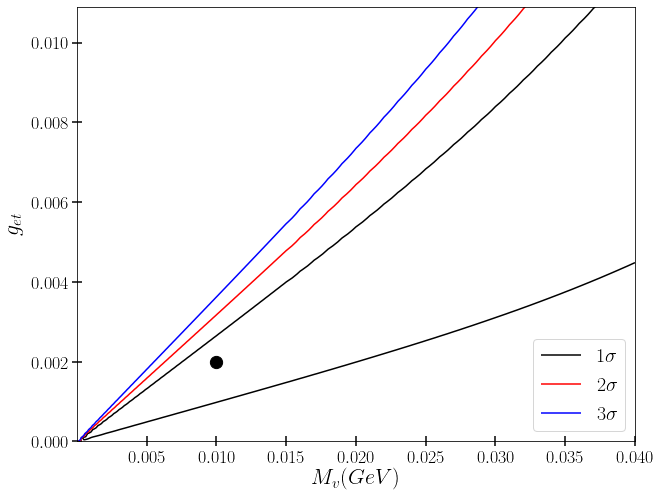

In [30]:
#%matplotlib qt
%matplotlib inline 

label_size = 22
tick_size = 18
ticks_font = 'Calibri'
fig, ax = plt.subplots(figsize=(10,8))



mvs = np.concatenate((mVs,np.arange(0.015, 0.041, 0.001)), axis=0)
gets = np.arange(0.000, 0.011, res)

y , x = np.meshgrid(gets, mvs)
CS = ax.contour(x, y , chi2get1, colors=('k', 'r', 'blue'),  levels =  [1,4,9]) 

labels = [r'1$\sigma$', r'2$\sigma$',r'3$\sigma$']
for i in range(len(labels)):
    ax.collections[i].set_label(labels[i])
    
plt.legend(loc='lower right', frameon=True, fontsize = label_size-2)

#ax.set_yscale('log')
#ax.set_xscale('log')
ax.set_xlabel(r"$M_v (GeV)$", fontsize = label_size)
ax.set_ylabel(r"$g_{et}$", fontsize = label_size)

ax.tick_params(which = 'major', axis='both', direction = 'inout', length=10,  width = 1.5)


for label in ax.get_xticklabels():
    label.set_fontproperties(ticks_font)

for label in ax.get_yticklabels():
    label.set_fontproperties(ticks_font)
    
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(tick_size) 
    
    
#ax.set_xlim(0.001, 0.04)

ax.scatter(0.010, 0.002, marker = 'o', s = 150, c = 'k')

plt.savefig("./Large_Mass_get_n_faser=%s_BESTFIT.pdf"%str(n_faser))